# US Gas Prices vs. SPY ETF Closing Prices
### COLLECTION TIME: FRIDAY ###

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

Gas prices in the US have been closely monitored for a long time now as our country has shifted towards a more car-centric infrastructure and culture. Because everyone owns a car and our economy is entering into a recession, the price of gas is important for all Californians as many commute for work and need their cars for everyday travel. In recent years, the price of gas has been elevated due to unfortunate global circumstances such as the COVID pandemic and the war on Ukraine which placed heavy stress on the oil industry. However, as the price for gas remains high and nothing’s changed, our group decided to see if there was a different reason for the long lasting gas inflation. We decided to use data to determine if there might be a correlation between weekly gas prices and the weekly closing price of the SPY 500 ETF. Our goal is to determine if there is a statistically significant correlation that may be able to explain current gas price behavior. 

# Names

- Antara Sengupta
- Iris Lee
- Alan Wen
- Abdul Ibrahim
- Jose Espinoza
- Gino Dominguez

<a id='research_question'></a>
# Research Question

Is there a significant correlation between weekly regular gas prices in California and the weekly closing prices of the SPY ETF between January 2010 and December 2020?

<a id='background'></a>

## Background & Prior Work

   Our topic looks into the historical data set containing the weekly averages of gas prices in California and compares it to the weekly closing average of the SPY 500 ETF from January 2010 to December 2020. The goal of the comparison is to see if a correlation exists between the two datasets. We know that the SPY ETF contains ~9% industrial products, ~5% energy, and 3% utilities and want to see to what extent, if any, this plays into correlating with gas price. Our hypothesis states that the increases and decreases of the SPY ETF will be correlated to the increase/decrease of gas prices, on a monthly timeline.

   Similar studies have been conducted to view the correlation of gas prices and different ETFs within the stock market on a monthly time frame. In a more general and less specific study, we can look at the research done by Taki Tsaklanos (1). Instead of just focussing on the SPY ETF, he looked at the stock market as a whole and tested to see if there was a correlation to oil prices. He concluded that since 2006, there has been a strong stock market correlation to oil prices. He further concluded that this correlation is strongest when the markets are in a ‘risk on’ mode; when investors are carrying a heavier risk with the market conditions. More similar to our study, would be a study done by Ray, S (2), he found that the price of gas was correlated to OIL Futures and SPY. He also found that gas prices were strongly correlated to Bonds, specifically high-yield bonds. Ray concludes that oil will cease to be a driving force of the stock and bond markets.
    
   What sets our study apart from others is that we will specifically focus on whether there is a correlation of gas prices with the SPY etf, since it tends to be a model of how the economy is performing.
S&P 500 is an abbreviation for a company named Standard & Poor’s, a leading index provider and data source of independent credit ratings of performance for the largest 500 publicly traded companies in the United States
A mutual fund allows investors to pool their money with other investors to buy stocks, bonds, or other securities. 
An ETF or ‘Exchange-Traded Fund’ is a type of pooled investment security that operates like a mutual fund.
SPY ETF is an ‘Exchange-Traded Fund’ that tracks the performance of the S&P 500 Index, which is a stock market index that holds the largest 500 publicly traded companies in the United States.	

References (include links):
- (Taki, T. (2016, December 21). How Strong Is The Stock Market Correlation To Oil Prices? Retrieved from   seekingalpha.com
- (Ray, S. (2016, February 25). Why stocks & oil are correlated | etf.com. etf.com. Retrieved from Why Stocks and Oil are Correlated
- Charles Schwab & Co., Inc. (n.d.). Understanding Mutual Funds. Schwab. https://www.schwab.com/mutual--funds/understand-mutual-funds
- Investopedia. (n.d.). Exchange-Traded Fund (ETF). Investopedia. https://www.investopedia.com/terms/e/etf.asp


# Hypothesis


We expect increases and decreases in gas prices(oil prices) to be correlated with increases/decreases in SPY ETF closing prices. We believe this is true because historically lower crude oil prices have been followed by reduced aggregate earnings in S&P 500 companies.

# Dataset(s)

**Dataset 1: Dataset Name: SPY ETF Dataset (weekly prices)**
Link to the dataset: https://finance.yahoo.com/quote/SPY/history?period1=1262304000&period2=1609372800&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true 
- Number of observations: 575 
- This dataset contains the historical data of the SPY etf from January 2010, to December 2020. It is held in a csv file and contains the Date,Open,High,Low,Close,Adj Close,Volume for each week.

**Dataset 2: Dataset Name: Weekly California Regular All Formulations Retail Gasoline Prices**
Link to the dataset: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPMR_PTE_SCA_DPG&f=W 
- Number of observations: 1148 
- This dataset contains the weekly California retail gasoline prices in dollars per gallon.

We will use both these datasets as one of them has data regarding SPY ETFs, while the other has to do with gas prices, therefore it will help us approach our research question, which investigates the correlation between California gas prices and closing prices of the SPY ETF. In our data analysis and visualizations, we will merge these two datasets in order to analyze and observe correlation-indicating patterns.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, chisquare, normaltest,pearsonr

In [2]:
# Loading the data
spyData = pd.read_csv('SPY.csv')
gasData = pd.read_csv('gas.csv')

In [3]:
spyData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,112.370003,114.330002,111.510002,114.190002,89.125450,477690000
1,2010-01-08,113.889999,115.139999,113.220001,114.930000,89.702988,673652800
2,2010-01-15,114.730003,115.129997,111.559998,111.699997,87.181969,912805600
3,2010-01-22,111.199997,111.739998,107.910004,108.570000,84.739006,1332016300
4,2010-01-29,109.040001,110.589996,106.419998,106.440002,83.076538,1244316900
...,...,...,...,...,...,...,...
569,2020-11-27,363.839996,368.190002,359.170013,366.690002,354.578003,295427200
570,2020-12-04,367.320007,371.049988,364.429993,366.730011,354.616699,273986800
571,2020-12-11,364.899994,372.459991,363.260010,372.239990,359.944641,313320100
572,2020-12-18,370.970001,378.459991,362.029999,369.000000,356.811676,353537300


In [4]:
gasData

,Date,Weekly Average(Dollars per Gallon)
0,"Jan 04, 2010",2.987
1,"Jan 11, 2010",3.046
2,"Jan 18, 2010",3.026
3,"Jan 25, 2010",3.008
4,"Feb 01, 2010",2.975
...,...,...
569,"Nov 30, 2020",3.032
570,"Dec 07, 2020",3.041
571,"Dec 14, 2020",3.040
572,"Dec 21, 2020",3.060


# Data Cleaning

Describe your data cleaning steps here.

In [5]:
# Data Cleaning
# We only need to look at the Date and Close columns of the data set
spyData = spyData.loc[:, ['Date', 'Close']]
# Convert the ‘Date’ column to datetime format for panda functionality 
spyData['Date'] = pd.to_datetime(spyData['Date'])
# Gas csv file already only contains just the date and average weekly prices so we don't need to clean out other columns 
# Convert the ‘Date’ column to datetime format for panda functionality 
gasData['Date'] = pd.to_datetime(gasData['Date'])
# Remove any potential missing values
spyData = spyData.dropna()
gasData = gasData.dropna()

In [6]:
spyData

,Date,Close
0,2010-01-01,114.190002
1,2010-01-08,114.930000
2,2010-01-15,111.699997
3,2010-01-22,108.570000
4,2010-01-29,106.440002
...,...,...
569,2020-11-27,366.690002
570,2020-12-04,366.730011
571,2020-12-11,372.239990
572,2020-12-18,369.000000


In [7]:
gasData

,Date,Weekly Average(Dollars per Gallon)
0,2010-01-04,2.987
1,2010-01-11,3.046
2,2010-01-18,3.026
3,2010-01-25,3.008
4,2010-02-01,2.975
...,...,...
569,2020-11-30,3.032
570,2020-12-07,3.041
571,2020-12-14,3.040
572,2020-12-21,3.060


In [8]:
#create a merged dataframe that will help us compare the gas costs and SPY ETF closing prices over the same timeline
merged_df = pd.merge_asof(spyData, gasData, on='Date',direction='nearest')
merged_df

,Date,Close,Weekly Average(Dollars per Gallon)
0,2010-01-01,114.190002,2.987
1,2010-01-08,114.930000,3.046
2,2010-01-15,111.699997,3.026
3,2010-01-22,108.570000,3.008
4,2010-01-29,106.440002,2.975
...,...,...,...
569,2020-11-27,366.690002,3.032
570,2020-12-04,366.730011,3.041
571,2020-12-11,372.239990,3.040
572,2020-12-18,369.000000,3.060


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

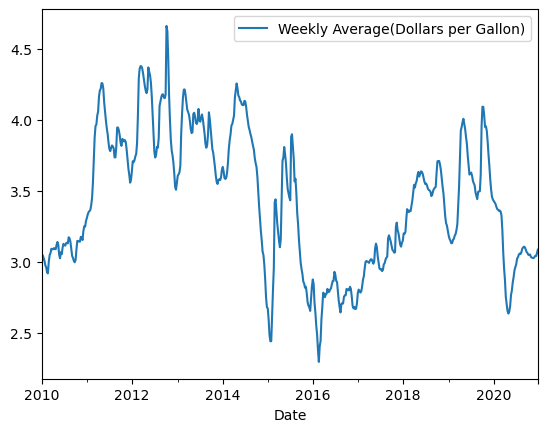

In [9]:
gasDataPlot = gasData.plot(x='Date', y='Weekly Average(Dollars per Gallon)', kind='line')

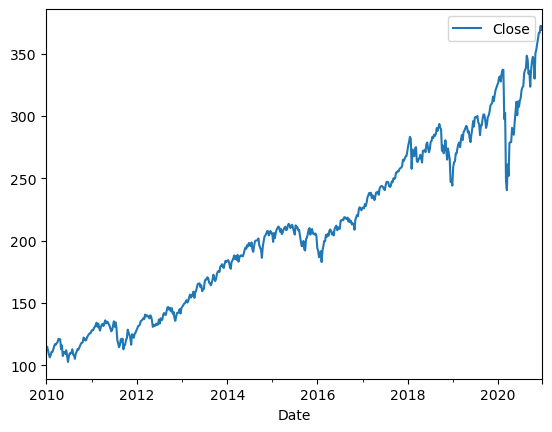

In [10]:
spyDataPlot = spyData.plot(x='Date', y='Close', kind='line')

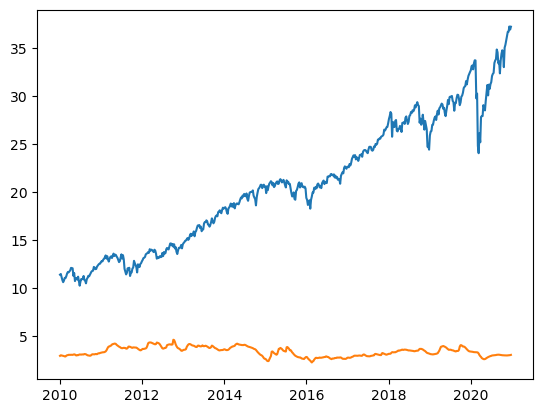

In [11]:
line_df = merged_df
line_df['Close'] = line_df['Close']/10 #scale the data
plt.plot(line_df['Date'], line_df['Close'], label='SPY Data')
plt.plot(merged_df['Date'], merged_df['Weekly Average(Dollars per Gallon)'], label='Gas Data')

As we can see, the graph above is a little hard to get the full picture from, due to the difference in scale of the two values. Below, we will make adjustments using code in order to get a better visualization that we can conclude stronger analyses from.

Text(0.5, 1.0, 'Trends in SPY Prices and Weekly Average Gas Prices in California')

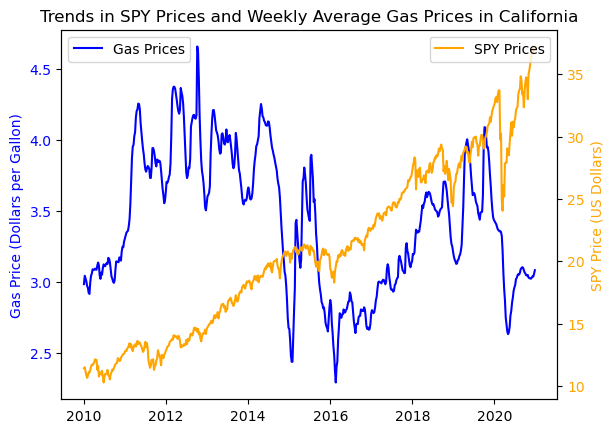

In [12]:
fig, ax1 = plt.subplots()
ax1.plot(merged_df['Date'], merged_df['Weekly Average(Dollars per Gallon)'], label='Gas Prices', color='blue')
ax1.set_ylabel('Gas Price (Dollars per Gallon)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Close'], label='SPY Prices', color='orange')
ax2.set_ylabel('SPY Price (US Dollars)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Trends in SPY Prices and Weekly Average Gas Prices in California') 

We can observe an upward trend and overlap in datasets between 2016-2020 for both datasets, indicating a correlative relationship, which we will explore more with statistical tests later.

<AxesSubplot:>

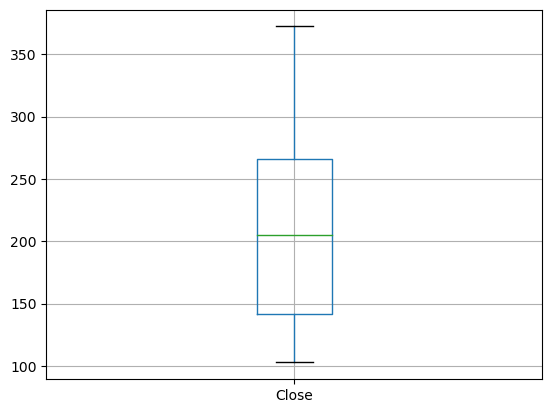

In [13]:
#Boxplot of SPY Data
spyData.boxplot()

<AxesSubplot:>

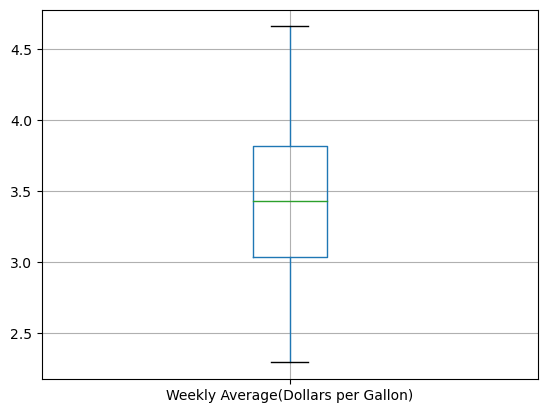

In [14]:
#Boxplot of gas Data
gasData.boxplot()

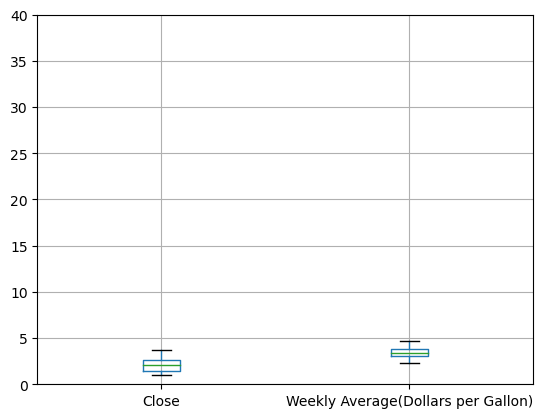

In [15]:
#Create a boxplot using merged data to compare the 2
temp_df = merged_df
temp_df['Close'] = temp_df['Close'] / 10 #scaling the spy data to match that of the weekly average to observe changes in increase/decrease
temp_df.boxplot()
plt.ylim(0,40)
plt.show()

In [16]:
# Prep datasets to merge into one dataframe
# Convert the 'Date' columns in each dataset to datetime format
gasData['Date'] = pd.to_datetime(gasData['Date'])
spyData['Date'] = pd.to_datetime(spyData['Date'])
gasData.set_index('Date', inplace=True)
spyData.set_index('Date', inplace=True)

Text(0, 0.5, 'SPY ETF Closing Price (USD)')

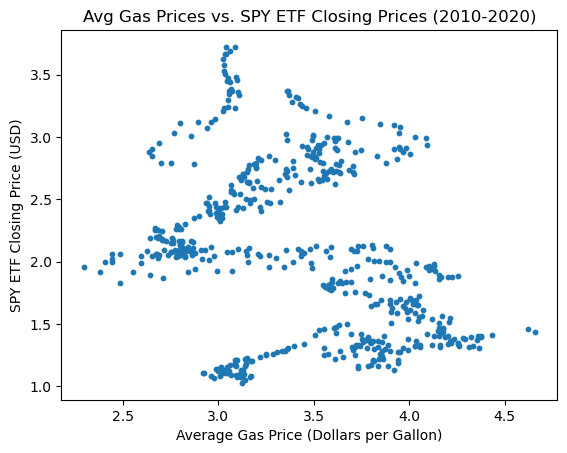

In [17]:
plt.scatter(merged_df['Weekly Average(Dollars per Gallon)'], merged_df['Close'], s=10)
plt.title('Avg Gas Prices vs. SPY ETF Closing Prices (2010-2020)')
plt.xlabel('Average Gas Price (Dollars per Gallon)')
plt.ylabel('SPY ETF Closing Price (USD)')

Text(0.5, 1.0, 'KDE Plot: Avg Weekly Gas Prices vs. Avg Weekly SPY ETF Closing')

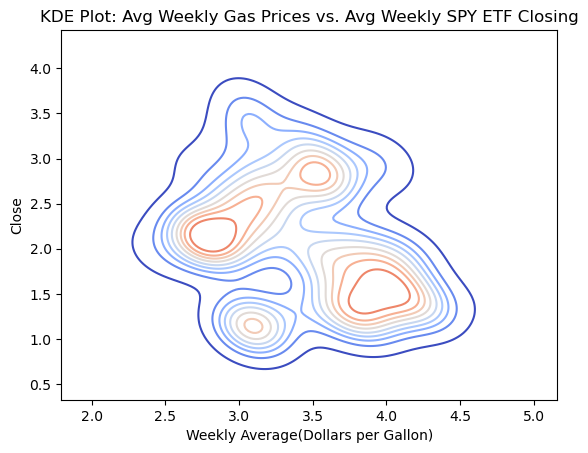

In [18]:
# Not the best graph to interpret correlation in our case
# Maybe heatmap will help?
sns.kdeplot(x=merged_df['Weekly Average(Dollars per Gallon)'], y=merged_df['Close'], cmap='coolwarm')
plt.title('KDE Plot: Avg Weekly Gas Prices vs. Avg Weekly SPY ETF Closing')

In [19]:
# Data point distribution visualized a little better, but can we actually draw any correlational conclusion?
# Heat maps seem to be hard to interpret the results for our dataset and hypothesis

In [20]:
# Instead lets generate a table of values relating to the directional change of gas price and spy closing price
# Create two new columns in merged dataframe to showcase its weekly directional change relative to the dataset
merged_df['Gas Direction'] = merged_df['Weekly Average(Dollars per Gallon)'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
merged_df['SPY Direction'] = merged_df['Close'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
price_directions = merged_df[['Date', 'Gas Direction', 'SPY Direction']]
print(price_directions)

          Date Gas Direction SPY Direction
0   2010-01-01      Decrease      Decrease
1   2010-01-08      Increase      Increase
2   2010-01-15      Decrease      Decrease
3   2010-01-22      Decrease      Decrease
4   2010-01-29      Decrease      Decrease
..         ...           ...           ...
569 2020-11-27      Increase      Increase
570 2020-12-04      Increase      Increase
571 2020-12-11      Decrease      Increase
572 2020-12-18      Increase      Decrease
573 2020-12-25      Increase      Increase

[574 rows x 3 columns]


In [21]:
# We can now see directional change of price based on weeks for each dataset
# price_direction is a table that shows direction of price change with the following 4 cases:
# For each week, datasets either: 1) decrease, 2)increase, 3) decrease and increase, or 4) increase and decrease

In [22]:
# Count the instances in which the price direction is the same or different
grouped = merged_df.groupby(['Gas Direction', 'SPY Direction']).size().reset_index(name='Count')
print(grouped)

  Gas Direction SPY Direction  Count
0      Decrease      Decrease    132
1      Decrease      Increase    190
2      Increase      Decrease     91
3      Increase      Increase    161


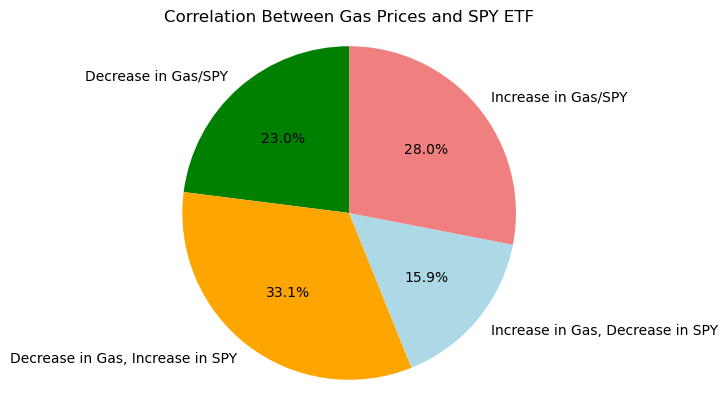

In [23]:
# Graph the grouped variable to better visualize the instances of similar price direction
# A simple piechart can help visualize the proportion of occurences where price direction is the same or different
labels = ['Decrease in Gas/SPY', 'Decrease in Gas, Increase in SPY', 'Increase in Gas, Decrease in SPY', 'Increase in Gas/SPY']
sizes = [132, 190, 91, 161]
colors = ['green', 'orange', 'lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Correlation Between Gas Prices and SPY ETF')
plt.show()

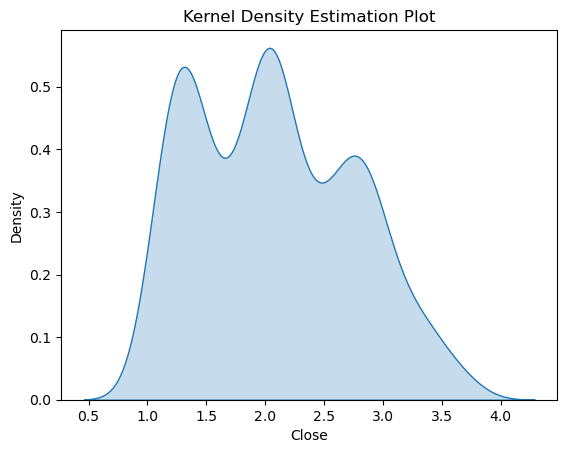

In [24]:
#Graph a kernel density estimation for the SPY ETF closing prices
sns.kdeplot(data=merged_df['Close'], shade=True)

# Customize the plot
plt.title('Kernel Density Estimation Plot')

# Show the plot
plt.show()

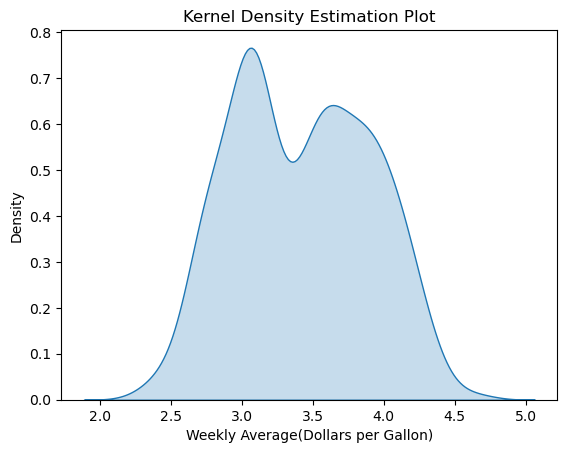

In [25]:
#Graph a kernel density estimation for the gas prices
sns.kdeplot(data=merged_df['Weekly Average(Dollars per Gallon)'], shade=True)

# Customize the plot
plt.title('Kernel Density Estimation Plot')

# Show the plot
plt.show()

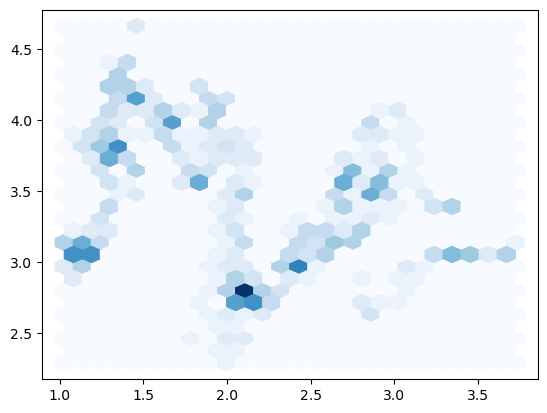

In [26]:
#Graph hexbin plot
plt.hexbin(merged_df['Close'],merged_df['Weekly Average(Dollars per Gallon)'], gridsize=25, cmap='Blues')
plt.show()

This data visualization doesn't seem to be as helpful/informative as others, especially line plots. When looking at variable relationships and distributions from now on, our scatter and line plots above may be the most effective visualization to utilize.

## Statistical Tests ##

In [27]:
#Extracting values for statistical tests from dataframes

In [28]:
spy = merged_df['Close']
gas = merged_df['Weekly Average(Dollars per Gallon)']

### Correlation Coefficient ###

In [29]:
#Calculating Pearson's r correlation coefficient 
corr, p_value = pearsonr(merged_df['Weekly Average(Dollars per Gallon)'], merged_df['Close'])
p_value

1.949077009580855e-12

### T-Test ###

In [30]:
#Calculate averages
avg_spy = spy.mean()
avg_gas = gas.mean()
#maybe add prints later

In [31]:
#Run t-test
t_val,p_val = ttest_ind(spy,gas)
p_val

2.1764669607838413e-211

In [32]:
# Code below checks if our statistical test indicates correlation, using an alpha value of 0.01
if p_val < 0.01:
    print('There is a significant correlation!')
else:
    print('There is NOT a significant correlation!')

There is a significant correlation!


### ANOVA ###

In [33]:
#Run ANOVA test
f_statistic, p_value = f_oneway(spy, gas)

# print the results
print('F-statistic:', f_statistic)
print('P-value:', p_value)



F-statistic: 1509.860718722881
P-value: 2.176466960782265e-211


### Linear Model with OLS Test ###

In [34]:
X = merged_df['Close']
y = merged_df['Weekly Average(Dollars per Gallon)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Weekly Average(Dollars per Gallon)   R-squared:                       0.083
Model:                                            OLS   Adj. R-squared:                  0.081
Method:                                 Least Squares   F-statistic:                     51.79
Date:                                Fri, 24 Mar 2023   Prob (F-statistic):           1.95e-12
Time:                                        18:12:43   Log-Likelihood:                -369.80
No. Observations:                                 574   AIC:                             743.6
Df Residuals:                                     572   BIC:                             752.3
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8500      0.063     61.540      0.000       3.727       3.973
Close         -0.2061      0.029     -7.196      0.000      -0.262      -0.150
==============================================================================
Omnibus:                      105.891   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.408
Skew:                          -0.127   Prob(JB):                     5.01e-06
Kurtosis:                       2.022   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What distributions do our variables take? 
- Gas data: From our data analysis and visualizations, we have observed no overall distribution in our variables and data. There seem to be three distinct peaks, which manifest due to historical events that are specific to the timeframes, and are reflected in the data. However, there seems to be a lack of overall correlation between the variables from the data in the timeframe that we are analyzing.

- Spy data: The variables seem to be distributed linearly, with a general upwards trend (eliminating the outliers). The variables are distributed in a manner such that the increase in y is usually observed with an increase in x.

Are there any outliers? 
- Gas data: The outlier values lie in 2015, 2016, and 2020. The outlier sets in 2015 & 2016 can be credited to receding geopolitical concerns and shifts in OPEC policies, which is why there are extreme dips/negative trends in data during this time period, while in 2020, there was a decrease in gas demand due to lockdown, which in turn reduced prices.

- SPY ETF data: The main outlier values lie in late 2019-2020, which is where there is a dip/negative trend in the graph, which itself is linear/increasing at most other times. This set of outlier values is due to the COVID-19 pandemic that had its most detrimental effects in that time span, and had a huge economical impact which in turn caused crashes in the stock market.

Relationship between variables? 
- Gas data: From our data analysis and visualizations, we have observed no consistent relationship between weekly gas prices and time (years), and the fluctuations in our data can be attributed to specific cirumstances as opposed to any relationship between the variables in observation.

- SPY ETF data: The relationship between our variables (year and weekly closing price) is linear, and we believe this can be attributed to the fact that the companies grow/increase value over the years which in turn increases stock prices. Essentially, provided with the information from our analysis, we have concluded that the relationship between the variables is a positive linear one, meaning the x and y values should generally increase simultaneously.

# Ethics & Privacy

Our project focused on analyzing the correlation between California gas prices and SPY closing prices using publicly available data sets. We took care to ensure that our analysis was conducted in an ethical and privacy-conscious manner, by maintaining accuracy, transparency, and privacy throughout the data collection and analysis process. Specifically, we conducted our analysis in a rigorous and systematic manner, using appropriate statistical methods to evaluate the correlation between gas prices and SPY. We also took steps to ensure that the data sets we used were anonymized and did not contain sensitive information. Overall, we believe that our project serves as an example of how to conduct data analysis in an ethical and responsible manner.

# Conclusion & Discussion

Our original hypothesis focused on the relation between gas prices and the SPY ETF, in California especially. A rudimentary look at the visualizations of our data intuitively show that there is a correlation between the SPY ETF and gas prices in California. Furthermore, we investigated this more thoroughly, performing various hypothesis tests on the data. Looking at the test results, we see that the P-value is low enough in all cases to show that there is a strong significant correlation between our two datasets. Therefore, while we can not prove any sort of causation, barring any sort of outstanding confounding variables, there is likely a strong relation between the SPY ETF and average gas prices in California.

# Team Contributions

- Antara Sengupta: Statistical Testing, Data visualizations, Data Analysis, Video Presentation
- Iris Lee: Planning/Brainstorming and Video Presentation 
- Alan Wen: Data conclusion & discussion and Video Presentation
- Abdul Ibrahim: Research Question & Hypothesis Generation, Data Collection & Cleaning, Data visualizations
- Jose Espinoza: Data visualizations, Statistical Testing, Ethics & Privacy
- Gino Dominguez: Planning/Brainstorming and Overview 

# Video Submission Location #

The video is linked at the bottom of our ReadMe in our git repo. Here is the link just in case:
https://youtu.be/VnE1eoeGZWo